In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import natsort as ns
from scipy.stats import sem,mode
from itertools import product
import mdtraj as md
import seaborn as sns
import pandas as pd

In [2]:
res_list = list(pd.read_pickle('../../data/EE/A8_RBFE.pkl').index)
print(res_list)

['R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P', 'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W']


In [3]:
A8_columns = ['S271', 'R272', 'V273', 'R274', 'A275', 'T276', 'S277', 'K278', 'F279',
       'A280', 'A281', 'L282', 'I283', 'A284', 'A285', 'E286', 'I287', 'A288',
       'R289', 'E290', 'F291', 'G292', 'Y293', 'T294', 'V295', 'D296', 'V297',
       'Q298', 'E299', 'V300', 'N301', 'G302', 'Q303', 'W304', 'E305', 'V306',
       'T307', 'F308']
A13_columns = ['I271', 'E272', 'I273', 'S274', 'V275', 'T276', 'T277', 'P278', 'F279',
       'A280', 'C281', 'Q282', 'I283', 'A284', 'A285', 'E286', 'I287', 'W288',
       'R289', 'A290', 'F291', 'G292', 'Y293', 'E294', 'V295', 'K296', 'I297',
       'D298', 'D299', 'D300', 'N301', 'G302', 'N303', 'C304', 'R305', 'L306',
       'V308']
A18_columns = ['Q271', 'D272', 'Y273', 'T274', 'F275', 'T276', 'D277', 'P278', 'F279',
       'A280', 'Q282', 'I283', 'A284', 'A285', 'E286', 'I287', 'L288', 'R289',
       'D290', 'F291', 'G292', 'Y293', 'D294', 'T296', 'V297', 'Q298', 'T299',
       'N300', 'N301', 'G302', 'E303', 'R305', 'V306', 'R307']
inde = ['R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P', 'A', 'V',
       'I', 'L', 'M', 'F', 'Y', 'W']
charges = {'A':0,'N':0,'C':0,'Q':0,'G':0,'I':0,'L':0,'M':0,'F':0,'P':0,'S':0,'T':0,'W':0,'Y':0,'V':0,'H':0,'K':1,'R':1,'D':-1,'E':-1}


In [4]:
HA2 = np.arange(0,269)
mini = np.arange(269,309)
pairs = list(product(HA2,mini))
A8_structure = md.load('../../data/structures/A8_dry.pdb')
A13_structure = md.load('../../data/structures/A13_dry.pdb')
A18_structure = md.load('../../data/structures/A18_simulation.pdb')

A8_interface = md.compute_contacts(A8_structure,contacts=pairs)
A13_interface = md.compute_contacts(A13_structure,contacts=pairs)
A18_interface = md.compute_contacts(A18_structure,contacts=pairs)

A8_indices = [int(i) for i in np.argwhere(A8_interface[0] <= 0.45,)[:,1]]
A13_indices = [int(i) for i in np.argwhere(A13_interface[0] <= 0.45,)[:,1]]
A18_indices = [int(i) for i in np.argwhere(A18_interface[0] <= 0.45,)[:,1]]

A8_interface_residues = np.unique([pairs[i][1] for i in A8_indices])
A13_interface_residues = np.unique([pairs[i][1] for i in A13_indices])
A18_interface_residues = np.unique([pairs[i][1] for i in A18_indices])

A8_interface_residues = [A8_structure.top.residue(i).code+str(A8_structure.top.residue(i).index+1) for i in A8_interface_residues]
A13_interface_residues = [A13_structure.top.residue(i).code+str(A13_structure.top.residue(i).index+1) for i in A13_interface_residues]
A18_interface_residues = [A18_structure.top.residue(i).code+str(A18_structure.top.residue(i).index+1) for i in A18_interface_residues]

interface_residues = {'A8':A8_interface_residues,'A13':A13_interface_residues,'A18':A18_interface_residues}
np.save('A8_interface_residues.npy',A8_interface_residues)
np.save('A13_interface_residues.npy',A13_interface_residues)
np.save('A18_interface_residues.npy',A18_interface_residues)

In [5]:
def make_file_dict(prefix):
    dihedrals_path='path/to/dihedrals'
    d = {}
    files = [file.path for file in os.scandir(f'{dihedrals_path}/dihedrals') if file.name.endswith('its.npy') and file.name.startswith(prefix)]
    for file in files:
        name = os.path.basename(file).split('_')
        wt = name[1][:4]
        if wt not in list(d.keys()):
            d[wt]={}
        m = name[1][-1]
        tr = np.load(file,allow_pickle=True)
        lt = np.load(f'{file.replace("its","lagtimes")}',allow_pickle=True)
        if len(tr) > 0:
            t = np.mean(tr,axis=0)
            e = sem(tr,axis=0)
            d[wt][m]=[lt,t,e]
    return d

In [6]:
A8 = make_file_dict('A8RL')
A13 = make_file_dict('A13RL')
A18 = make_file_dict('A18RL')

/home/kpman/miniconda3/envs/python311/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/kpman/miniconda3/envs/python311/lib/python3.11/site-packages/numpy/core/_methods.py:195: RuntimeWarning: divide by zero encountered in divide
  ret = um.true_divide(
/home/kpman/miniconda3/envs/python311/lib/python3.11/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [7]:
def get_stable_implied_timescales(d):
    stable_its = {}
    for res,v in d.items():
        lags = []
        stable_its[res]={}
        for mut, vals in v.items():
            lt = vals[0]
            p=vals[1]
            rl = 1
            der = [np.abs(p[i+rl]-p[i]) for i in range(len(p)-rl)]
            idx = np.argmin(der)+1
            lag = lt[idx]
            lags.append(lag)
        lagtime = int(mode(lags).mode)
        #lagtime = singleitem = (lambda x: x)(*lagtime)
        stable_its[res]['lagtime']=lagtime
        for mut,vals in v.items():
            idx = list(vals[0]).index(lagtime)
            t,e = vals[1][idx],vals[2][idx]
            stable_its[res][mut]=[t,e]
    return stable_its
        

In [8]:
A8_its = get_stable_implied_timescales(A8)
A13_its = get_stable_implied_timescales(A13)
A18_its = get_stable_implied_timescales(A18)

In [9]:
A8_lag = [value['lagtime'] for key,value in A8_its.items()]
A13_lag = [value['lagtime'] for key,value in A13_its.items()]
A18_lag = [value['lagtime'] for key,value in A18_its.items()]
lags = np.concatenate([A8_lag,A13_lag,A18_lag])
print(int(np.mean(lags).round()))

21


In [10]:
def get_standard_implied_timescales(d):
    stable_its = {}
    stable_its_error={}
    for res,v in d.items():
        lags = []
        stable_its[res]={}
        stable_its_error[res]={}
        #stable_its[res]['lagtime']=20
        lagtime=20
        for mut,vals in v.items():
            idx = list(vals[0]).index(lagtime)
            t,e = vals[1][idx],vals[2][idx]
            stable_its[res][mut]=t
            stable_its_error[res][mut]=e
    keys = [i[1:] for i in stable_its.keys()]
    sorted_indices = ns.index_natsorted(keys)
    stable_its = {list(stable_its.keys())[i]:stable_its[list(stable_its.keys())[i]] for i in sorted_indices}
    stable_its_error = {list(stable_its_error.keys())[i]:stable_its_error[list(stable_its_error.keys())[i]] for i in sorted_indices}

    return stable_its,stable_its_error

In [11]:
A8_its,A8e = get_standard_implied_timescales(A8)
A13_its,A13e = get_standard_implied_timescales(A13)
A18_its,A18e = get_standard_implied_timescales(A18)

In [88]:
import seaborn as sns
import matplotlib as mpl

def plot_its(stable_its,stable_its_error,interface_residues,name=None,ax=None):
    stable_its=pd.DataFrame(stable_its)
    stable_its_error=pd.DataFrame(stable_its_error)
    means = []
    interface=[]
    ni=[]
    r = list(stable_its.index)
    for i, col in enumerate(stable_its.columns):
        cmap = plt.get_cmap('tab20')
        m = np.nan_to_num(stable_its[col].values,nan=1)
        e = np.nan_to_num(stable_its_error[col].values,nan=1)
        ax.set_title(name,fontsize=30)
        sns.violinplot(x=i,y=[l for l in m if l !=1],ax=ax,fill=False,inner=None,log_scale=True)
        norm=mpl.colors.Normalize(vmin=0,vmax=1)
        c = [cmap(k) for k in range(len(m))]
        colors = {res:c[i] for i,res in enumerate(res_list)}
        labels = list(stable_its.index)
        for j, v in enumerate(m):
            if i == 0:
                if v!=1:
                    ax.scatter(x=i,y=v,color=norm(colors[r[j]]),label=labels[j])
                    ax.errorbar(x=i,y=v,yerr=e[j],ecolor=norm(colors[r[j]]),capsize=5)
                else:
                    ax.scatter(x=i,y=v,color=norm(colors[r[j]]),label=labels[j])
            else:
                if v !=1:
                    ax.scatter(x=i,y=v,color=norm(colors[r[j]]))
                    ax.errorbar(x=i,y=v,yerr=e[j],ecolor=norm(colors[r[j]]),capsize=5)
                else:
                    ax.scatter(x=i,y=v,color=norm(colors[r[j]]),label=labels[j])

            
        if col in interface_residues:
            ax.axvspan(i-0.5,i+0.5,color='grey',alpha=0.1)
        means.append(stable_its[col].mean())
        ax.set_ylabel('ITS (ns)')
        ax.set_xlabel('Residue')
        handles,labels = ax.get_legend_handles_labels()
    ax.plot(np.arange(len(means)),means,c='k')
    ax.get_legend().remove()
    ax.set_xticks(ax.get_xticks(),labels=list(stable_its.columns),rotation=90)
    ax.set_yscale("symlog")
    #ax.legend(handles,labels,bbox_to_anchor =(0.5,-0.45), loc='lower center',ncol=len(labels)/4)
    #fig.tight_layout()
    #fig.savefig(f'Overall_{name}_its_figure3.png',dpi=300)
    return handles,labels

# Make SI Figure of all ITS data

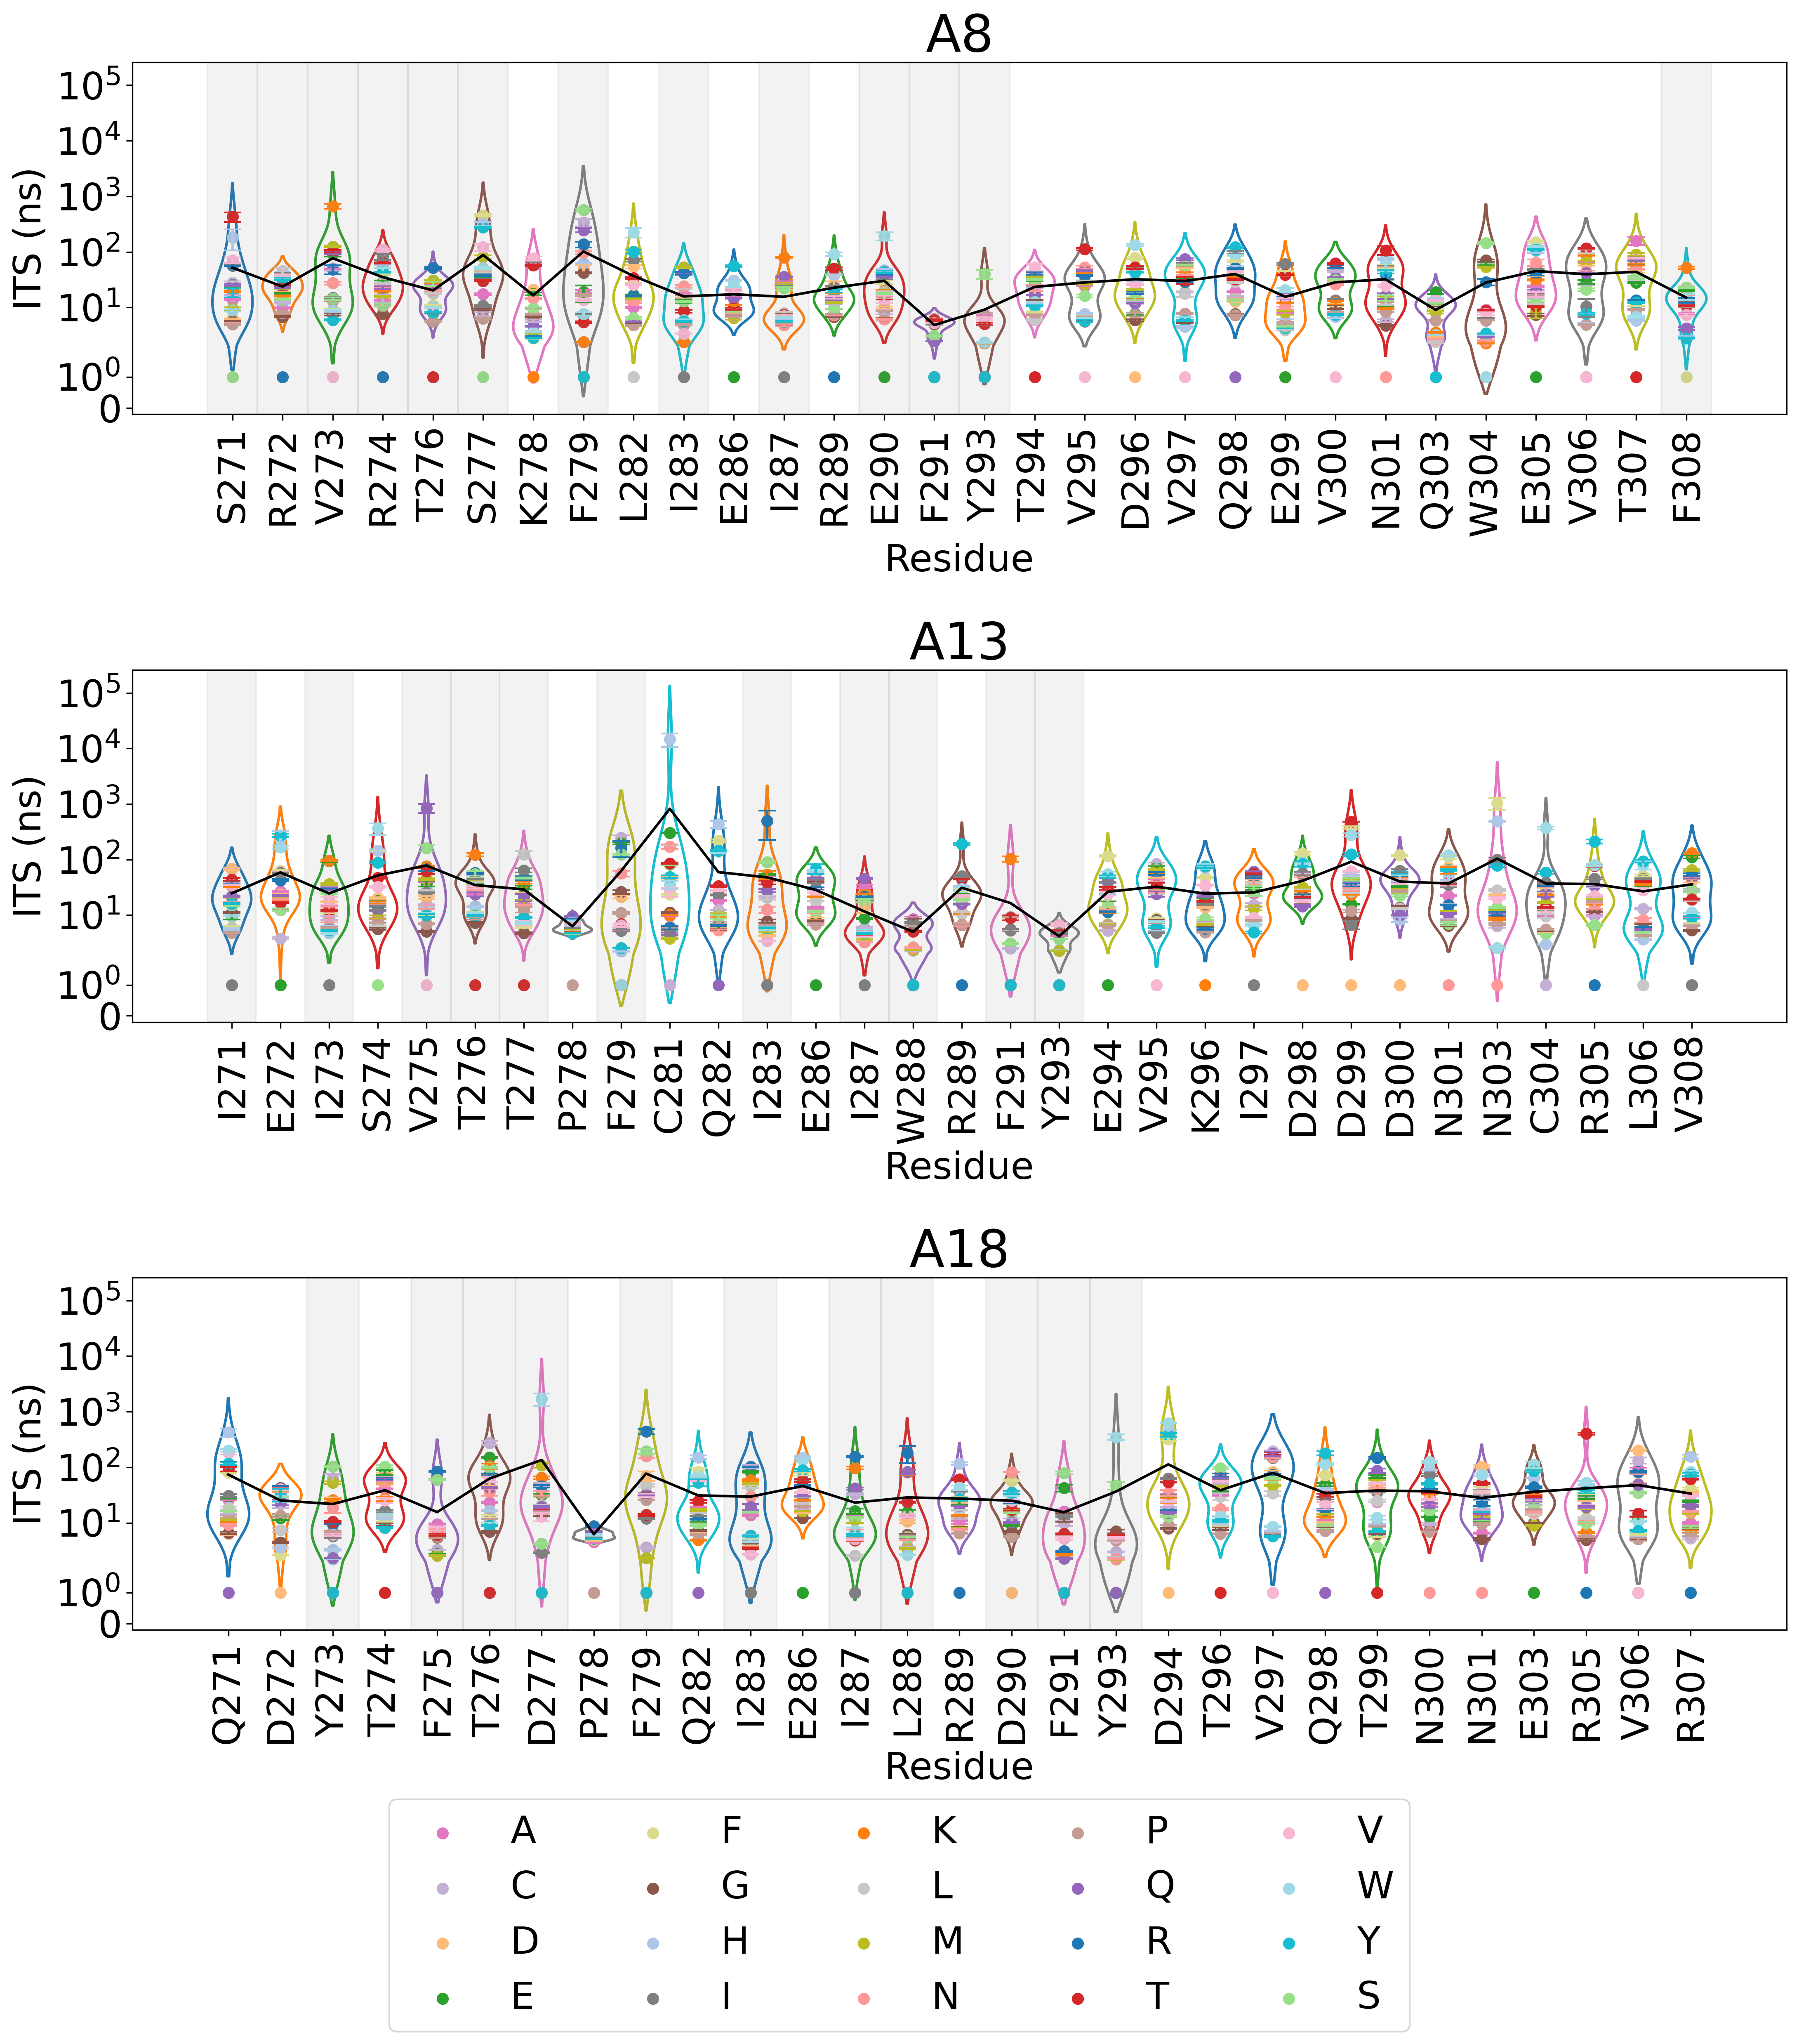

In [89]:
fig,axes = plt.subplots(3,1,figsize=(15,15),sharey=True,dpi=300)
plt.rcParams['font.size'] = 22
ax1,ax2,ax3 = axes.flat
h,l = plot_its(A8_its,A8e,A8_interface_residues,name='A8',ax=ax1)
plot_its(A13_its,A13e,A13_interface_residues,name='A13',ax=ax2)
plot_its(A18_its,A18e,A18_interface_residues,name='A18',ax=ax3)
unique= np.vstack([(han,lab) for i,(han,lab) in enumerate(zip(h,l)) if lab not in l[:i]])
fig.legend(unique[:,0],unique[:,1],bbox_to_anchor =(0.5,-0.12), loc='lower center',ncol=len(unique)/4)
fig.tight_layout()
fig.savefig('all_its.png',dpi=300,bbox_inches='tight')

In [15]:
import pandas as pd
def make_dataFrame(dic):
    temp={}
    for res,v in dic.items():
        temp[res]={}
        for mut, val in v.items():
            its = val
            temp[res][mut]=its
    df = pd.DataFrame(temp)
    res_list = list(df.columns)
    t = [i[1:] for i in res_list]
    res_list = [res_list[i] for i in ns.index_natsorted(t)]
    df=df[res_list]
    return df

In [16]:
A8_df = make_dataFrame(A8_its)
A13_df = make_dataFrame(A13_its)
A18_df = make_dataFrame(A18_its)

In [118]:
ff_dic = np.load('../../data/mut_res_number.npy',allow_pickle=True).item()
fep_dic = {i:[] for i in ff_dic.keys()}

dic = {'A8':A8_df,'A13':A13_df,'A18':A18_df}

for key,val in dic.items():
    mnp = key.split('_')[0]
    mut_res = val.index
    columns = val.columns
    for i,col in enumerate(columns):
        wt_res = col[0]
        for mut in mut_res:
            if mut == wt_res:
                continue
            res_type = f'{wt_res}2{mut}'
            print(res_type,end="\r")
            v = val[col][mut]
            try:
                fep_dic[res_type].append(v)
            except:
                continue
nums = np.unique(list(ff_dic.values()))
temp_fep = {i:[] for i in nums}
final_fep = {i:[] for i in nums}
for key,val in fep_dic.items():
    num_tran = ff_dic[key]
    if val:
        [temp_fep[num_tran].append(i) for i in val if not np.isnan(i)]

# Plot Distribution of ITS' by Amino Acid

In [17]:
import pandas as pd
residues = res_list
dfs = [A8_df,A13_df,A18_df]
res_dic={i:[] for i in residues}
#res_dic_from={i:[] for i in residues if i!='A'}
for df in dfs:
    indices = df.index
    for column in df.columns:
        r1 = column[0]
        for idx in indices:
            v = df[column][idx]
            r2 = idx
            if not np.isnan(v):
                res_dic[r2].append(v)
                res_dic[r1].append(v)

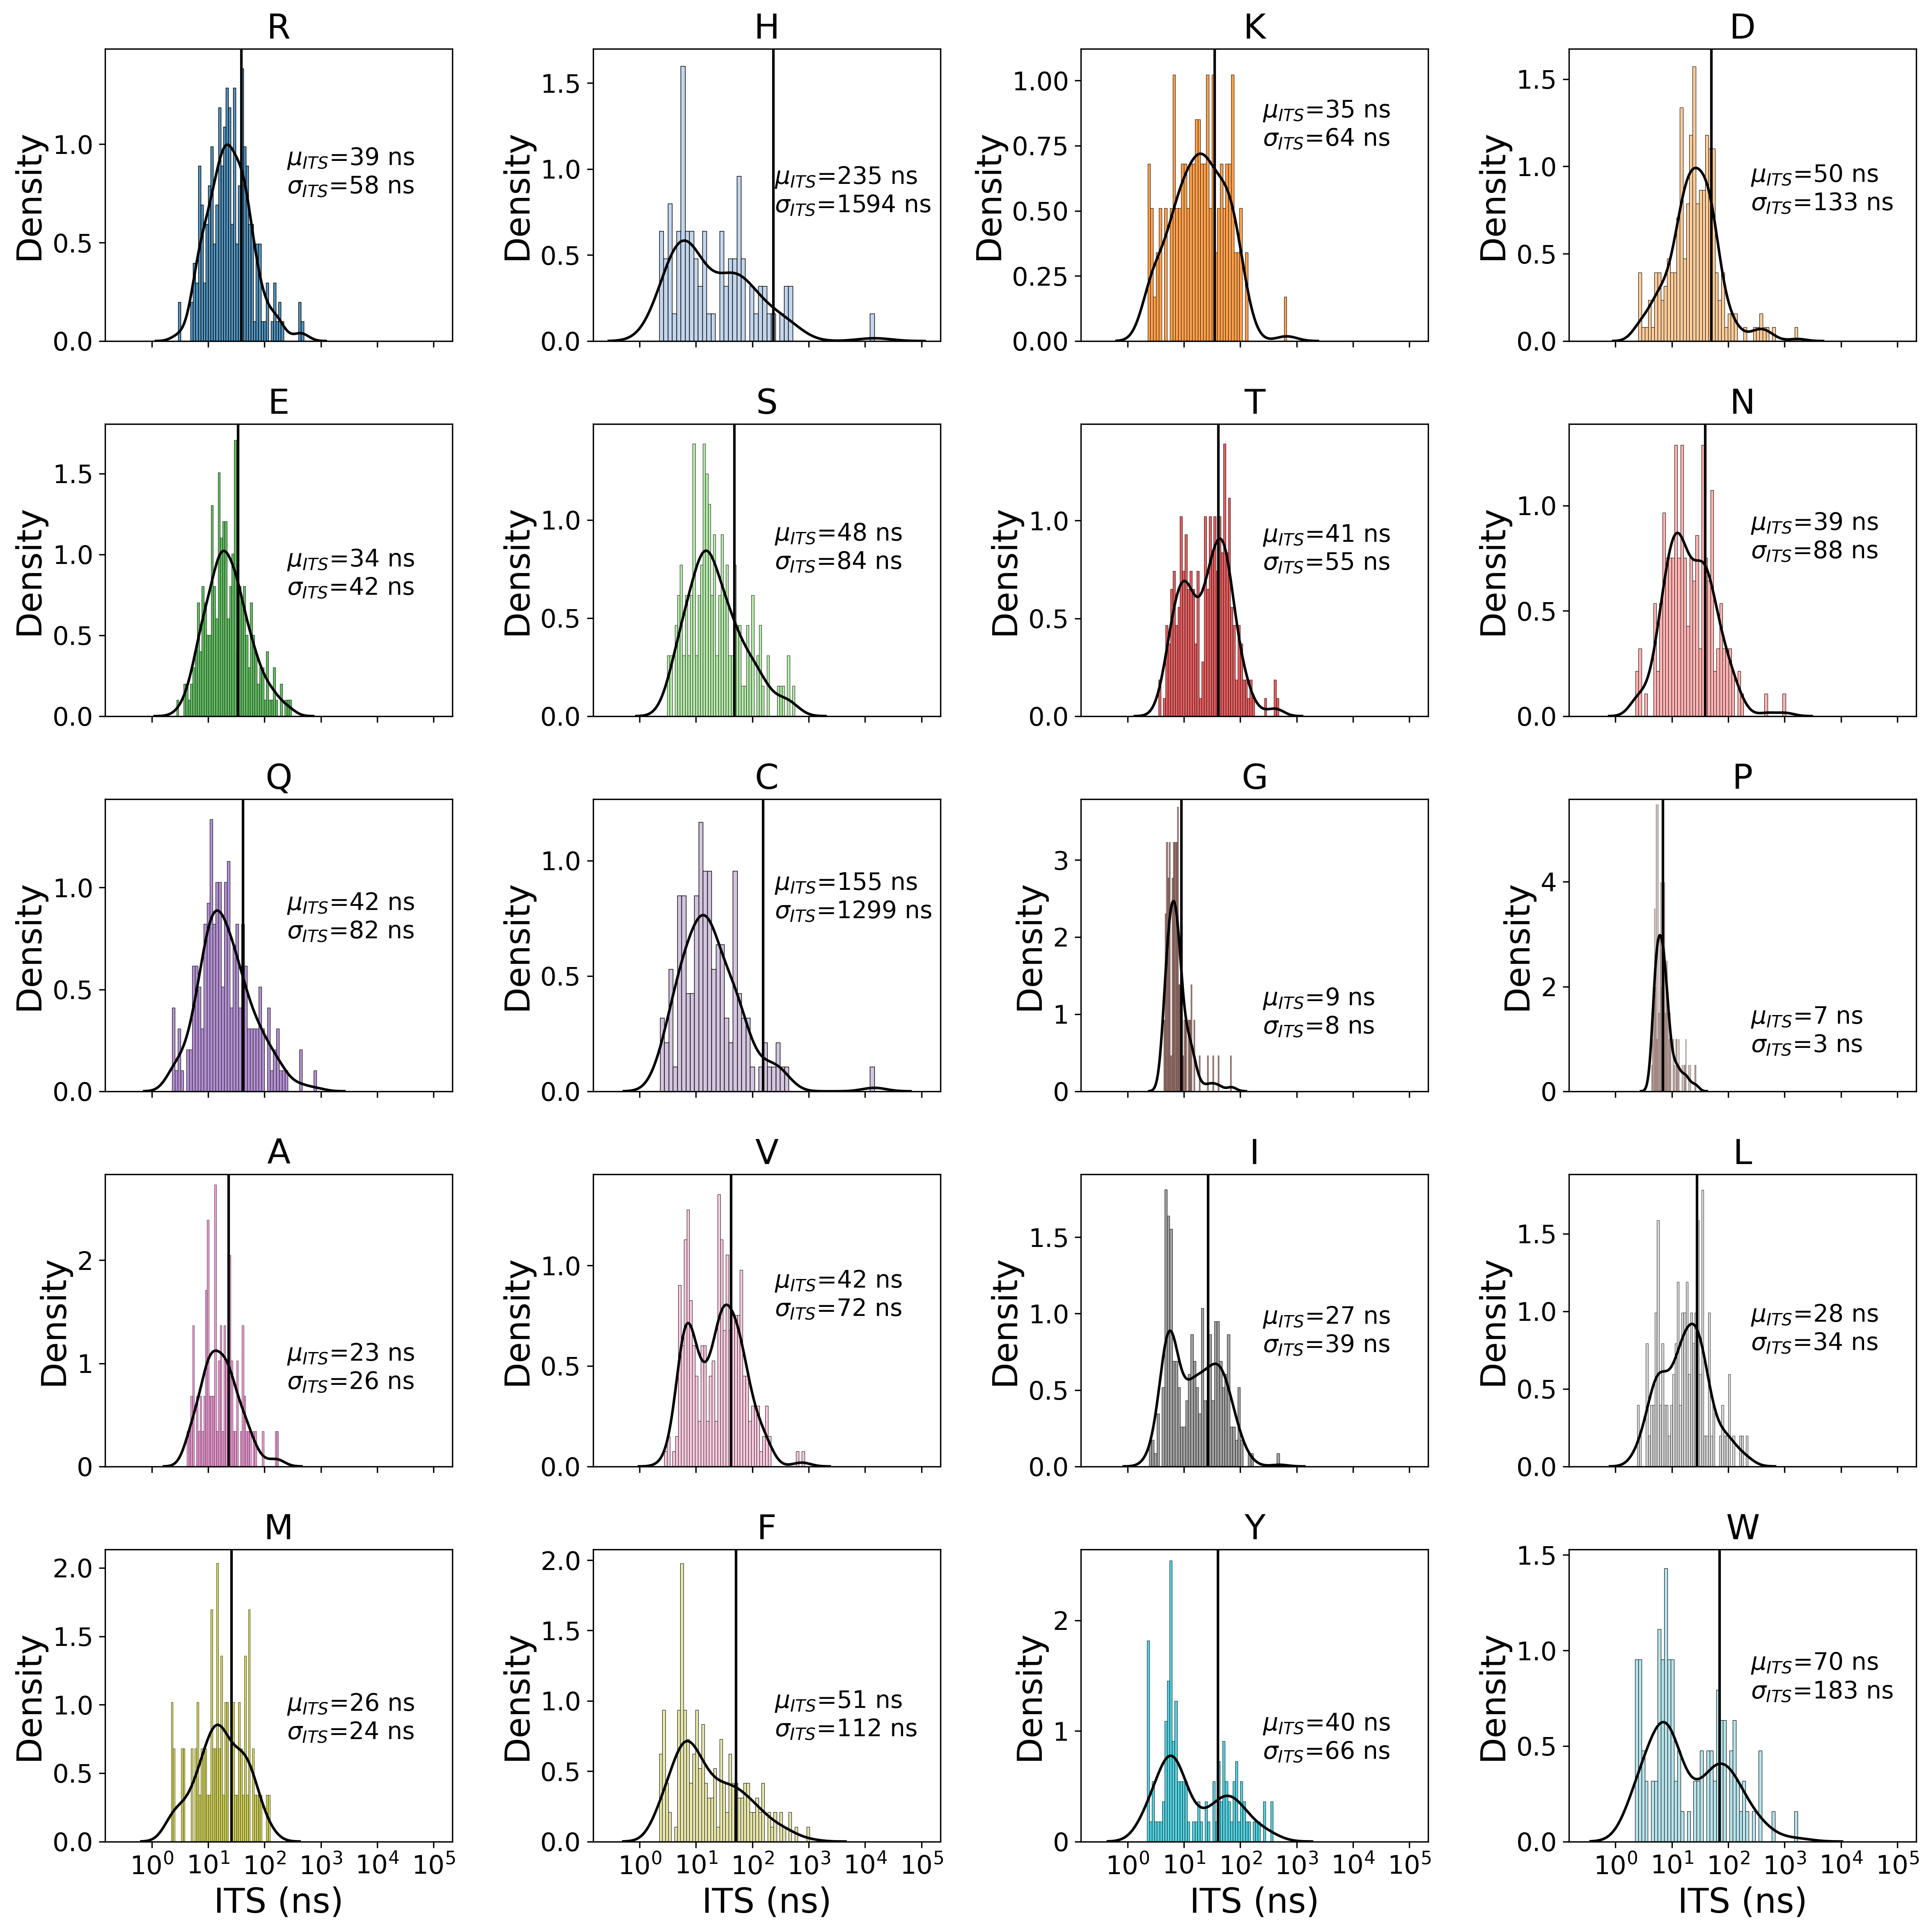

In [89]:
fig,axes = plt.subplots(5,4,figsize=(16,16),sharex=True,dpi=300)
plt.rcParams['font.size'] = 17
cmap = plt.get_cmap('tab20')
m = len(res_dic.keys())
c = [cmap(k) for k in range(m)]
colors = {res:c[i] for i,res in enumerate(res_list)}
labels = list(res_dic.keys())
norm=mpl.colors.Normalize(vmin=0,vmax=1)
#_=[axes.flat[i].hist(val,label=key,color=colors[i],bins=100,histtype='step',density=True) for i,(key,val) in enumerate(res_dic.items()) if val]
_=[sns.histplot(x=val,label=key,color=norm(colors[key]),ax=axes.flat[i],log_scale=True,stat='density',bins=50) for i,(key,val) in enumerate(res_dic.items()) if val]
_=[sns.kdeplot(x=val,label=key,color='k',ax=axes.flat[i],log_scale=True) for i,(key,val) in enumerate(res_dic.items()) if val]
means=[]
stds=[]
for i,ax in enumerate(axes.flat):
    ax.set_title(labels[i],fontsize=20)
    ax.set_xticks([1,10,100,1000,10000,100000])
    ax.set_xlabel('ITS (ns)',fontsize=20)
    ax.set_ylabel('Density',fontsize=20)

    mean = int(np.mean(list(res_dic.values())[i]))
    std = int(np.std(list(res_dic.values())[i]))
    means.append(mean)
    stds.append(std)
    hist,bins = np.histogram(list(res_dic.values())[i],bins=50,density=True)
    max_bin_height = max(ax.patches, key=lambda x: x.get_height()).get_height()
    string = '$\mu_{ITS}$'+f'={mean} ns\n'+'$\sigma_{ITS}$'+f'={std} ns'
    ax.text(250,0.75,string,fontsize=14)
    ax.vlines(mean,0,6,color='k')
    ax.set_ylim(0,max_bin_height+0.1)
    ax.tick_params(axis='both',labelsize=15)

fig.tight_layout()
fig.savefig('ITS_by_amino_acid.png',dpi=300)

In [18]:
A8_fep_error = pd.read_pickle('../../data/EE/A8_variance.pkl')
A13_fep_error = pd.read_pickle('../../data/EE/A13_variance.pkl')
A18_fep_error = pd.read_pickle('../../data/EE/A18_variance.pkl')
residues = res_list
dfs = [A8_fep_error,A13_fep_error,A18_fep_error]
res_dic_err={i:[] for i in residues}
#res_dic_from={i:[] for i in residues if i!='A'}
for df in dfs:
    indices = df.index
    for column in df.columns:
        r1 = column[0]
        for idx in indices:
            v = df[column][idx]
            r2 = idx
            if not np.isnan(v):
                res_dic_err[r2].append(v)
                res_dic_err[r1].append(v)

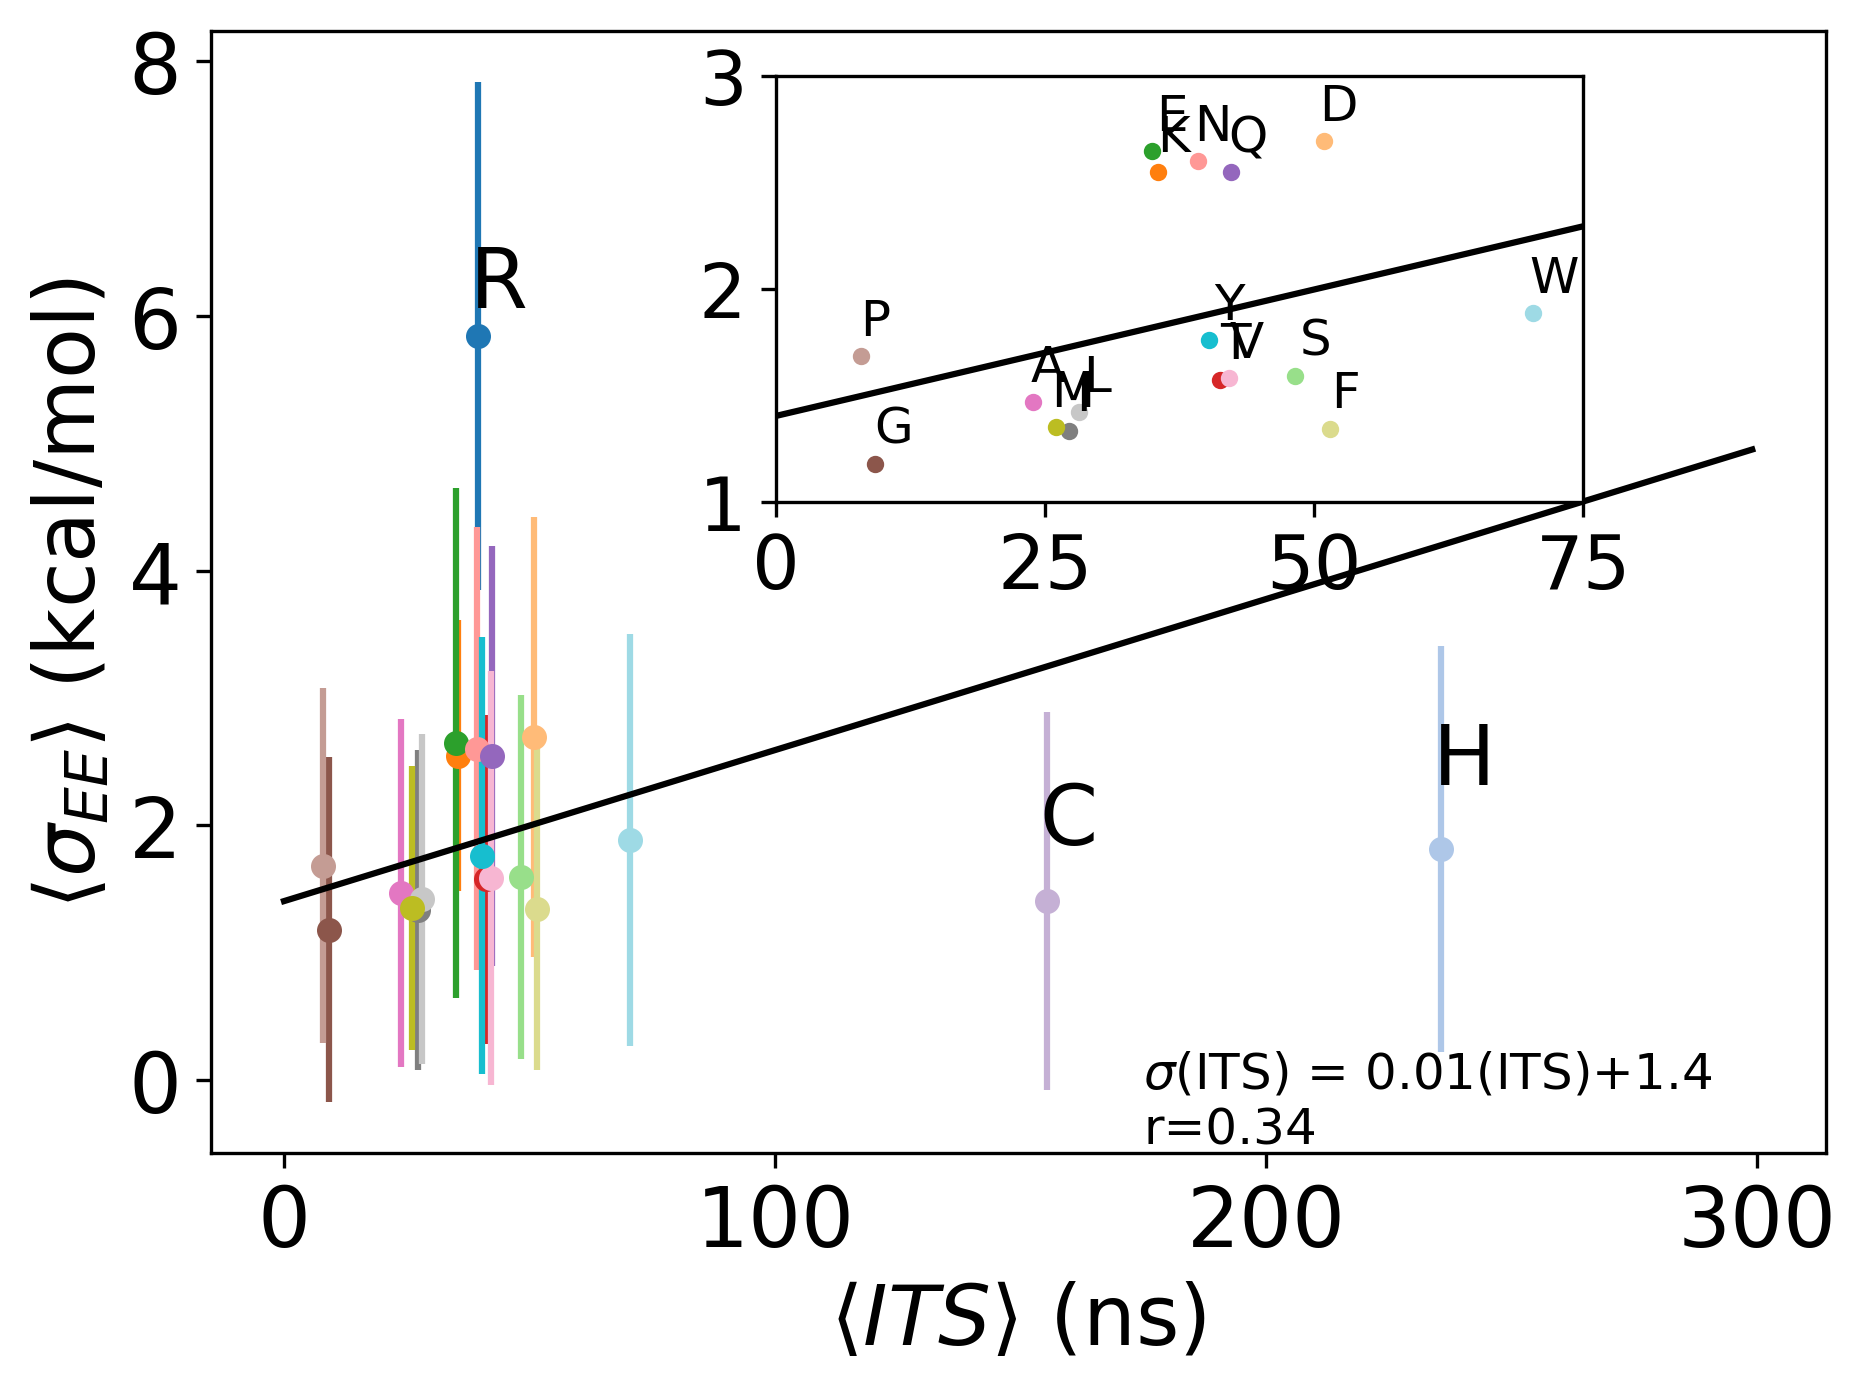

In [91]:
from scipy.stats import linregress
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['font.size'] = 12

x = []
y = []
cmap = plt.get_cmap('tab20')
m = len(res_dic.keys())
c = [cmap(k) for k in range(m)]
colors = {res:c[i] for i,res in enumerate(res_list)}
norm=mpl.colors.Normalize(vmin=0,vmax=1)
fig,ax=plt.subplots(dpi=300)
axins = ax.inset_axes([0.35,0.58,0.5,0.38])
for key, val in res_dic_err.items():
    mean_err = np.mean(val)
    std_err = np.std(val)
    mean_val = np.mean(res_dic[key])
    min_val = np.min(res_dic[key])
    max_val = np.max(res_dic[key])
    
    # Calculate the lower error limit
    lower_errors = np.minimum(mean_val - min_val, std_err)

    ax.errorbar(mean_val, mean_err,
                 yerr=std_err, marker='.', markersize=10, color=norm(colors[key]))
    if key in ['R','C','H']:
        jitter_x = np.random.uniform(0, 0.6)
        jitter_y = np.random.uniform(0, 0.6)
        plt.annotate(key, (mean_val+jitter_x, mean_err+jitter_y), 
                     textcoords="offset points", xytext=(5,5), ha='center'
                    ,fontsize=20)
    if (key != 'R') and (np.mean(res_dic[key]) < 100):
        y.append(mean_err)
        x.append(np.mean(res_dic[key]))

# Perform linear regression
xs = np.arange(300)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate y values for the regression line
regression_line = slope * xs + intercept
ax.plot(xs, regression_line, color='k', label='Regression Line')
ax.set_xlabel(r'$\langle ITS \rangle$ (ns)',fontsize=20)
ax.set_ylabel(r'$\langle \sigma_{EE} \rangle$ (kcal/mol)',fontsize=20)
ax.tick_params(axis='both',labelsize=20)
string = f'$\sigma$(ITS) = {slope.round(2)}(ITS)+{intercept.round(2)}\nr={r_value.round(2)}'
ax.text(175,-0.5,string)

#### Inset Axis ####
x = []
y = []
for i,(key, val) in enumerate(res_dic_err.items()):
    mean_err = np.mean(val)
    std_err = np.std(val)
    mean_val = np.mean(res_dic[key])
    min_val = np.min(res_dic[key])
    max_val = np.max(res_dic[key])
    
    # Calculate the lower error limit
    lower_errors = np.minimum(mean_val - min_val, std_err)

    axins.scatter(mean_val, mean_err,s=10, color=norm(colors[key]))
    
    jitter = np.random.uniform(0, 0.6)
    axins.annotate(key, (mean_val-jitter, mean_err),textcoords='offset points',xytext=(5,5), ha='center')
    if (key != 'R') and (np.mean(res_dic[key]) < 100):
        y.append(mean_err)
        x.append(np.mean(res_dic[key]))

# Perform linear regression
xs = np.arange(300)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate y values for the regression line
regression_line = slope * xs + intercept
axins.plot(xs, regression_line, color='k', label='Regression Line')
#axins.set_xlabel(r'$\langle ITS \rangle$ (ns)')
#axins.set_ylabel(r'$\langle \sigma_{FEP} \rangle$ (kcal/mol)')
string = f'$\sigma$(ITS) = {slope.round(2)}(ITS)+{intercept.round(2)}\nr={r_value.round(2)}'
#ax.text(150,6,string)
axins.set_xlim(0,75)
axins.set_ylim(1,3)
axins.tick_params(axis='both',labelsize=18)

## Finish It Up ###
#ax.set_xscale('log')
fig.tight_layout()
fig.savefig('Uncertainty_V_ITS.png',dpi=300)